In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mobile_price.csv")
df.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape


(2000, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.isna().sum()


Unnamed: 0       0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.drop(['Unnamed: 0'],axis =1,inplace =True)

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='price_range', ylabel='count'>

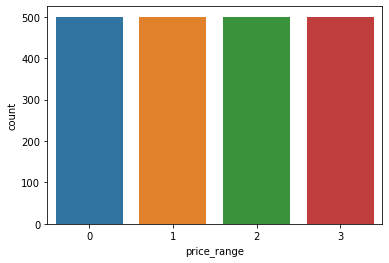

In [8]:
sns.countplot(df['price_range'], data=df)

<AxesSubplot:>

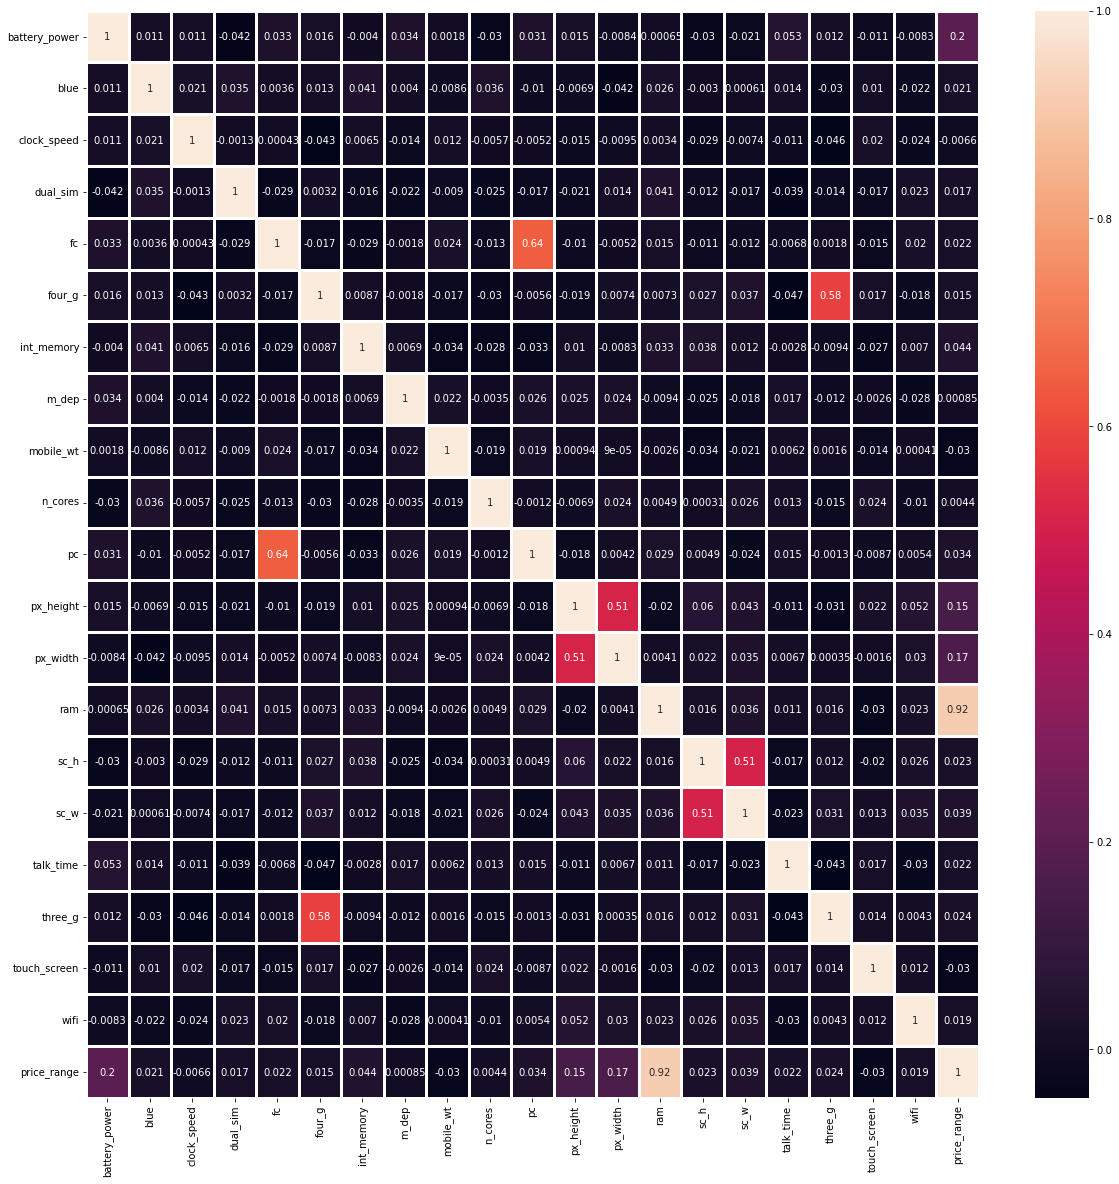

In [9]:
# check correlation between variables
plt.figure(figsize=(20,20))
corr = df.corr();
sns.heatmap(corr,annot=True,linewidth=3,)

From the correlation heatmap, 'ram', battery_power and px has strong correlation with the target, price_range

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# lets extract some features from the dataset. We will use this new features to build a model to predict the price range

#mobile_price = df[['battery_power','ram','n_cores','int_memory','price_range']]

## Prepare the dataset for machine learning model

In [14]:
# import require machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [15]:
# convert the price_range values to text
d = {0:'low',1:'normal',2:'high',3:'very high'}


In [53]:
# set target as Y and features as X
X = df[['battery_power','ram','n_cores','int_memory']].values
Y= mobile_price.iloc[:,-1]

In [55]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [56]:
# lets Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.3,random_state=42)

In [58]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (1400, 4)
x_test shape: (600, 4)
y_train shape: (1400,)
y_test shape: (600,)


### Build the Classification Model

In [59]:
# import ml model algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import pickle
from xgboost.sklearn import XGBClassifier

### 1. Logistic Regression Model

In [60]:
lr = LogisticRegression()

# train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)


In [61]:
# evaluate the model
print("Model Name: Logistic Regression")
print('Accuracy Score:' ,accuracy_score(y_test,lr_pred))
print("************* Classification Report *******\n", classification_report(y_test,lr_pred))
print("\n")
print(pd.crosstab(y_test,lr_pred))

Model Name: Logistic Regression
Accuracy Score: 0.8116666666666666
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       151
           1       0.78      0.79      0.79       146
           2       0.69      0.73      0.71       148
           3       0.86      0.81      0.83       155

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



col_0          0    1    2    3
price_range                    
0            138   13    0    0
1             12  116   18    0
2              0   20  108   20
3              0    0   30  125


<AxesSubplot:>

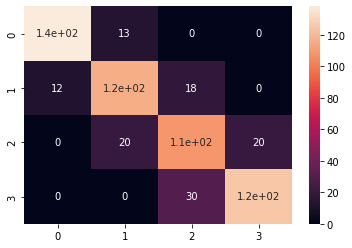

In [62]:
cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm,annot=True)

 The above model will be hyper tunned

In [63]:
lr_params ={'solver':['lbfgs', 'liblinear', 'newton-cg','saga'],
            'penalty':['l1', 'l2', None],
            'max_iter':[1,25,56,79,100]
            }

In [64]:
lr_tunned = RandomizedSearchCV(LogisticRegression(),param_distributions=lr_params,verbose=3,cv=5)

In [65]:
# train the tunned LogisticRegression model
lr_tunned.fit(x_train,y_train)
lr_tunned_pred = lr_tunned.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_iter=1, penalty=l2, solver=newton-cg;, score=0.536 total time=   0.0s
[CV 2/5] END max_iter=1, penalty=l2, solver=newton-cg;, score=0.550 total time=   0.0s
[CV 3/5] END max_iter=1, penalty=l2, solver=newton-cg;, score=0.546 total time=   0.0s
[CV 4/5] END max_iter=1, penalty=l2, solver=newton-cg;, score=0.586 total time=   0.0s
[CV 5/5] END max_iter=1, penalty=l2, solver=newton-cg;, score=0.550 total time=   0.0s
[CV 1/5] END max_iter=79, penalty=None, solver=newton-cg;, score=0.836 total time=   0.6s


[CV 2/5] END max_iter=79, penalty=None, solver=newton-cg;, score=0.814 total time=   0.6s
[CV 3/5] END max_iter=79, penalty=None, solver=newton-cg;, score=0.864 total time=   1.2s
[CV 4/5] END max_iter=79, penalty=None, solver=newton-cg;, score=0.804 total time=   1.0s
[CV 5/5] END max_iter=79, penalty=None, solver=newton-cg;, score=0.814 total time=   1.2s
[CV 1/5] END max_iter=56, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=56, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=56, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=56, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=56, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=79, penalty=l1, solver=saga;, score=0.836 total time=   0.2s
[CV 2/5] END max_iter=79, penalty=l1, solver=saga;, score=0.811 total time=   0.0s
[CV 3/5] END max_iter=79, penalty=l1, solver=saga;, score=0.864 

In [66]:
# evaluate the model
print("Model Name: Logistic Regression Tunned")
print('Accuracy Score:' ,accuracy_score(y_test,lr_tunned_pred))
print("************* Classification Report *******\n", classification_report(y_test,lr_tunned_pred))
print("\n")
print(pd.crosstab(y_test,lr_tunned_pred))

Model Name: Logistic Regression Tunned
Accuracy Score: 0.8116666666666666
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       151
           1       0.78      0.79      0.79       146
           2       0.69      0.73      0.71       148
           3       0.86      0.81      0.83       155

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



col_0          0    1    2    3
price_range                    
0            138   13    0    0
1             12  116   18    0
2              0   20  108   20
3              0    0   30  125


### 2. DecisionTree Classifier

In [67]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_pred = dtree.predict(x_test)

In [68]:
# evaluate the model
print("Model Name: DecisionTreeClassifier")
print('Accuracy Score:' ,accuracy_score(y_test,dtree_pred))
print("************* Classification Report *******\n", classification_report(y_test,dtree_pred))
print("\n")
print(pd.crosstab(y_test,dtree_pred))

Model Name: DecisionTreeClassifier
Accuracy Score: 0.7166666666666667
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       151
           1       0.64      0.67      0.65       146
           2       0.57      0.59      0.58       148
           3       0.82      0.74      0.78       155

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600



col_0          0   1   2    3
price_range                  
0            130  21   0    0
1             22  98  26    0
2              0  35  87   26
3              0   0  40  115


<AxesSubplot:>

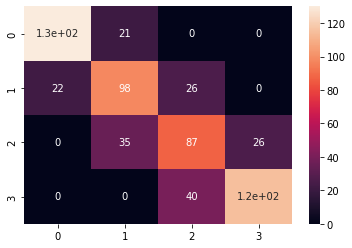

In [69]:
cm = confusion_matrix(y_test,dtree_pred)
sns.heatmap(cm,annot=True)

### 3. RandomForestClassifier

In [70]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf_pred = clf.predict(x_test)

In [71]:
# evaluate the model
print("Model Name: RandomForestClassifier")
print('Accuracy Score:' ,accuracy_score(y_test,clf_pred))
print("************* Classification Report *******\n", classification_report(y_test,clf_pred))
print("\n")
print(pd.crosstab(y_test,clf_pred))

Model Name: RandomForestClassifier
Accuracy Score: 0.8016666666666666
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       151
           1       0.74      0.79      0.77       146
           2       0.69      0.70      0.69       148
           3       0.87      0.80      0.84       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



col_0          0    1    2    3
price_range                    
0            138   13    0    0
1             15  116   15    0
2              0   27  103   18
3              0    0   31  124


<AxesSubplot:>

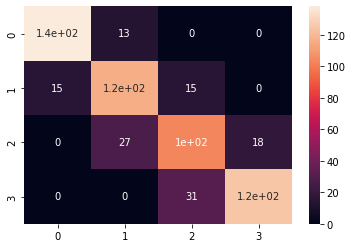

In [72]:
cm = confusion_matrix(y_test,clf_pred)
sns.heatmap(cm,annot=True)

In [78]:
pickle.dump(clf,open("rf_model.pkl","wb"))

In [75]:
# Optimizing RandomForestClassifier

rf_params = {'n_estimators':[  10, 25,53 , 75, 100  ],
             'max_depth':[2,3,8,10,13],
             'max_features':["sqrt", "log2", None],
             'criterion' : ["gini", "entropy", "log_loss",None]
             
    
}

In [76]:
rf_tunned = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rf_params,cv=5,verbose=3)

In [77]:
# train the tunned RandomForest
rf_tunned.fit(x_train,y_train)
fr_tunned_pred = rf_tunned.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=75;, score=0.821 total time=   7.5s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=75;, score=0.814 total time=   9.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=75;, score=0.846 total time=   6.1s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=75;, score=0.811 total time=   5.7s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=75;, score=0.818 total time=   2.8s
[CV 1/5] END criterion=None, max_depth=2, max_features=sqrt, n_estimators=53;, score=nan total time=   0.0s
[CV 2/5] END criterion=None, max_depth=2, max_features=sqrt, n_estimators=53;, score=nan total time=   0.0s
[CV 3/5] END criterion=None, max_depth=2, max_features=sqrt, n_estimators=53;, score=nan total time=   0.0s
[CV 4/5] END criterion=None, max_depth=2, max_features=sqrt, n_estimators=53;, score=nan total time=   0.0s
[CV 5/5] END crite

In [79]:
rf_tunned_pred = rf_tunned.predict(x_test)

In [80]:
# evaluate the model
print("Model Name: RandomForestClassifier Tunned")
print('Accuracy Score:' ,accuracy_score(y_test,rf_tunned_pred))
print("************* Classification Report *******\n", classification_report(y_test,rf_tunned_pred))
print("\n")
print(pd.crosstab(y_test,rf_tunned_pred))

Model Name: RandomForestClassifier Tunned
Accuracy Score: 0.805
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       151
           1       0.76      0.79      0.77       146
           2       0.68      0.72      0.70       148
           3       0.87      0.79      0.83       155

    accuracy                           0.81       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81      0.81      0.81       600



col_0          0    1    2    3
price_range                    
0            139   12    0    0
1             14  115   17    0
2              0   24  106   18
3              0    0   32  123


The model will be optimize

In [81]:
pickle.dump(rf_tunned,open("model.pkl","wb"))

In [82]:
model_test = pickle.load(open("model.pkl","rb"))

In [85]:
model_test.predict([[1940,1024,6,7]])

array([3], dtype=int64)

### 4. SVC

In [43]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [44]:
# evaluate the model
print("Model Name:SVC")
print('Accuracy Score:' ,accuracy_score(y_test,svc_pred))
print("************* Classification Report *******\n", classification_report(y_test,svc_pred))
print("\n")
print(pd.crosstab(y_test,svc_pred))

Model Name:SVC
Accuracy Score: 0.7983333333333333
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       151
           1       0.75      0.76      0.76       146
           2       0.69      0.73      0.71       148
           3       0.88      0.79      0.83       155

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



col_0          0    1    2    3
price_range                    
0            137   14    0    0
1             18  111   17    0
2              0   23  108   17
3              0    0   32  123


In [46]:
pickle.dump(svc,open("svc_model.pkl","wb"))

In [47]:
model =pickle.load(open("model.pkl","rb"))

### 5. XGBOOST Classifier

In [48]:
xgb = XGBClassifier(n_estimator=100, seed=1000,objective='binay:logistic')
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

[12:28:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [49]:
# evaluate the model
print("Model Name:XGboost")
print('Accuracy Score:' ,accuracy_score(y_test,xgb_pred))
print("************* Classification Report *******\n", classification_report(y_test,xgb_pred))
print("\n")
print(pd.crosstab(y_test,xgb_pred))

Model Name:XGboost
Accuracy Score: 0.795
************* Classification Report *******
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       151
           1       0.73      0.76      0.74       146
           2       0.68      0.72      0.70       148
           3       0.88      0.81      0.85       155

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.80       600
weighted avg       0.80      0.80      0.80       600



col_0          0    1    2    3
price_range                    
0            134   17    0    0
1             15  111   20    0
2              0   25  106   17
3              0    0   29  126
